# <span style = "color : green"> Graduate Admission Prediction </span>

***

This dataset is created for prediction of Graduate Admission from an Indian Perspective.This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.The dataset is owned by Mohan S Acharya.This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

### <span style = "color: blue"> Context </span>

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

### <span style = "color : brown"> Source </span>

Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

## Let's Dive into it

### Import necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'admission_predict.csv' and store it in a DataFrame

In [5]:
df = pd.read_csv('admission_predict.csv')

### View the top 5 rows

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### View the bottom 5 rows

In [7]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


### Check info of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### View the basic statistical information about the dataset

In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Check for any null values

In [10]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### Note: Currently our target variable ranges form 0 to 1. We need to make this a classification problem. Create a new variable named 'Admission' which has values 0 and 1. If Chance of admin < 0.5, Admission = 0. If chance of admit > 0.5, Admission = 1

In [11]:
# Create a function which converts values less than 0.5 to 0 and rest to 1
def zeroone(x):
    if x <= 0.5:
        return 0
    elif x > 0.5:
        return 1

In [12]:
df['Admission'] = df['Chance of Admit '].apply(zeroone)

In [13]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1


### Drop Chance of Admit and Serial No. column

In [14]:
df.drop(columns = ['Chance of Admit ', 'Serial No.'], inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1


## <span style = "color: orange"> Visualization </span>

### Plot a pairplot of the dataset

[]

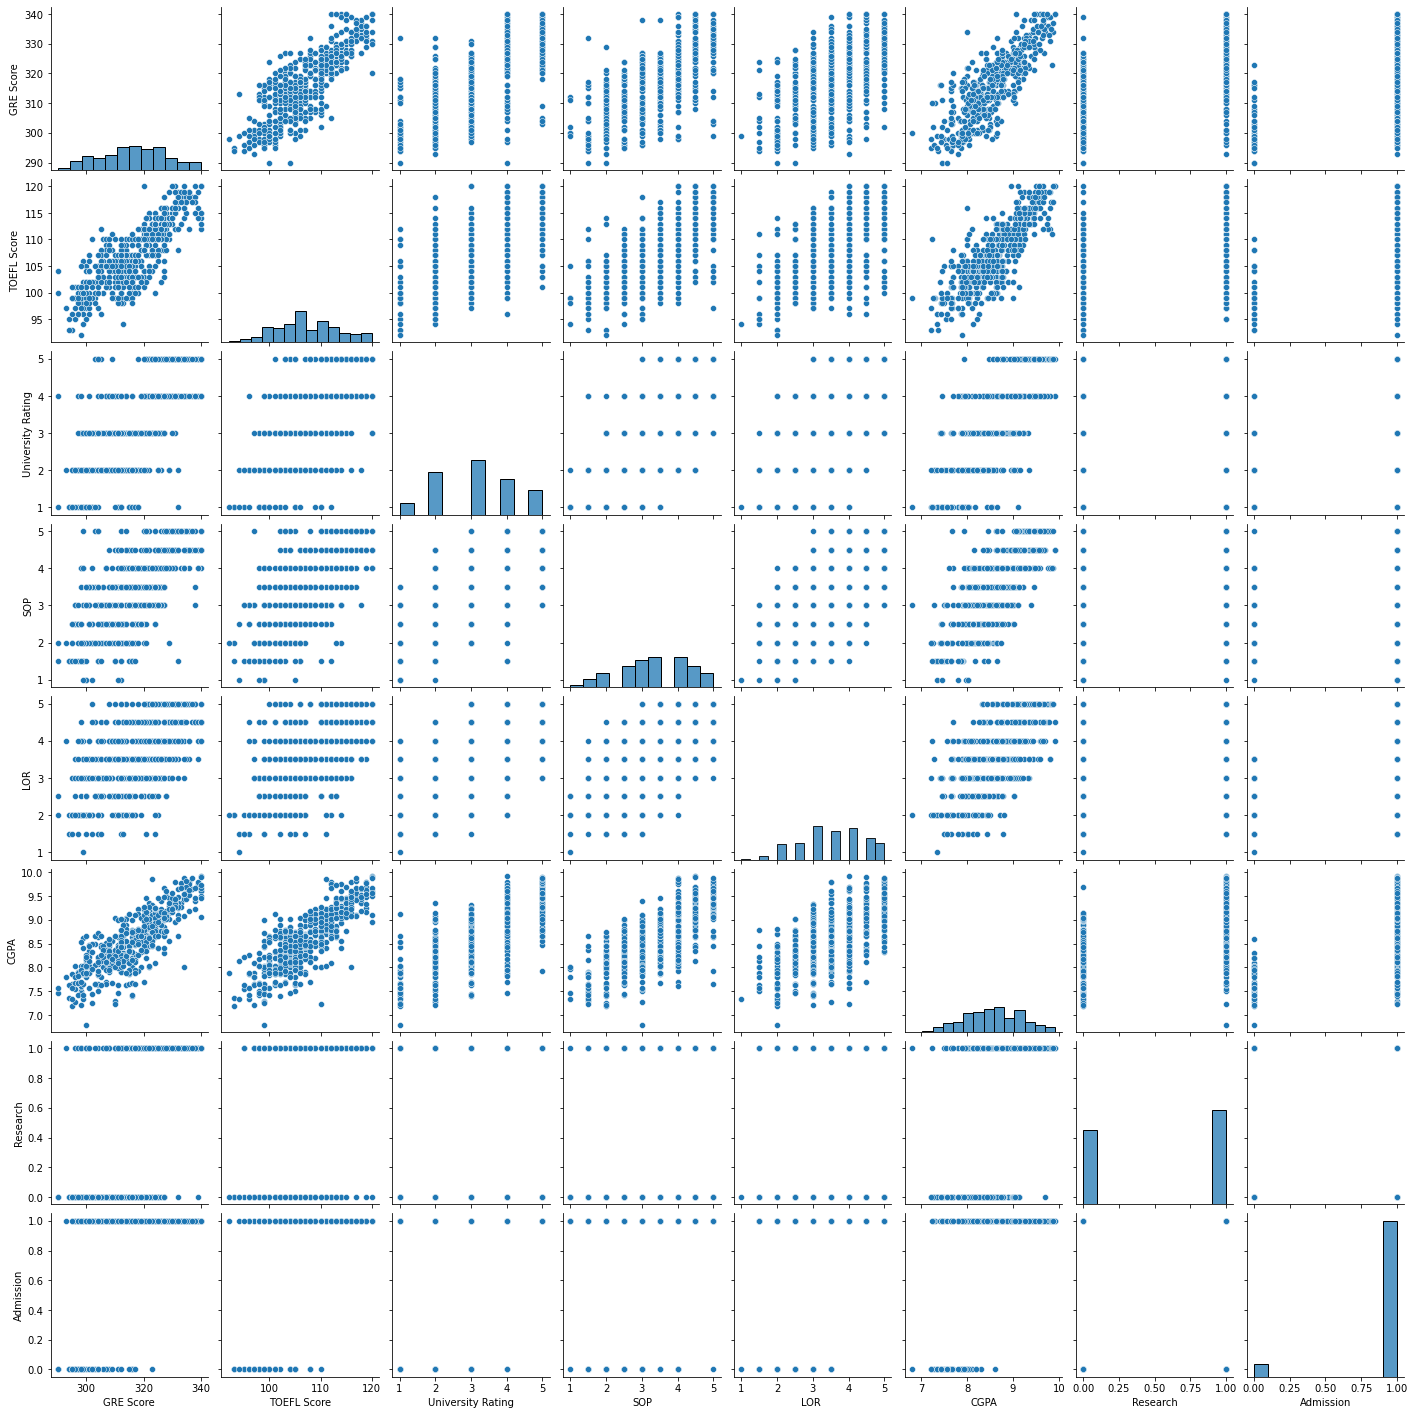

In [42]:
sns.pairplot(df)
plt.plot()

### Plot a heatmap to view correlation between the features

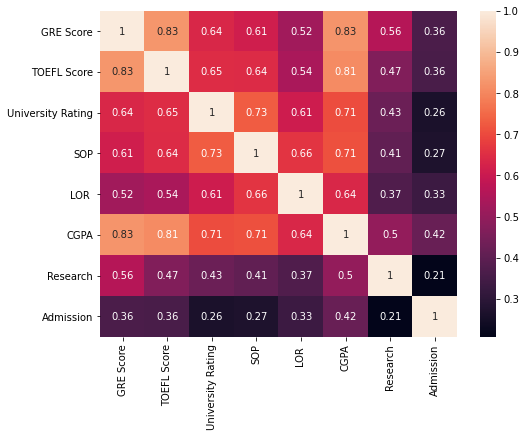

In [43]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Split the columns into Input and Target variables

In [15]:
X = df.drop(columns = ['Admission'])
y = df['Admission']

### Standardise the data using StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
xcolumns = X.columns

In [19]:
X = scaler.fit_transform(X)

In [20]:
X = pd.DataFrame(X, columns = xcolumns)

In [21]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


### Split the dataset into Training and Testing setL

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

### Check the shape of X_train and X_test

In [24]:
X_train.shape

(400, 7)

In [25]:
X_test.shape

(100, 7)

### Create a Decision Tree model and Train it

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model = DecisionTreeClassifier()

In [28]:
# Train the model

In [29]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Check the score of our model

In [30]:
model.score(X_train, y_train)

1.0

### Make predictions with X_test

In [31]:
y_pred = model.predict(X_test)

### Check the accuracy of our model

In [32]:
from sklearn import metrics

In [33]:
metrics.accuracy_score(y_test, y_pred)

0.92

### Create confusion matrix

In [34]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 3,  2],
       [ 6, 89]], dtype=int64)

### Plot confusion matrix on heatmap

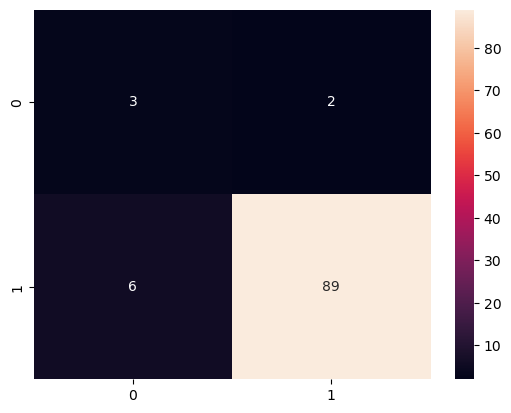

In [35]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True)
plt.show()

### Create classification report

In [36]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.98      0.94      0.96        95

    accuracy                           0.92       100
   macro avg       0.66      0.77      0.69       100
weighted avg       0.95      0.92      0.93       100



***

# <center><span style = "color:CornflowerBlue; font-family:Courier New;font-size:40px">EDURE LEARNING</span></center>